# Entregável 1 - visão computacional

In [2]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 3.3.1 


# Equalização de histograma

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(240, 320, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(240, 320)

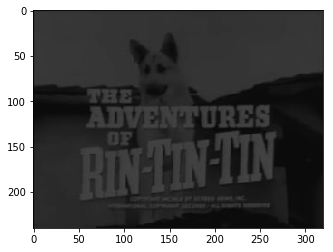

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

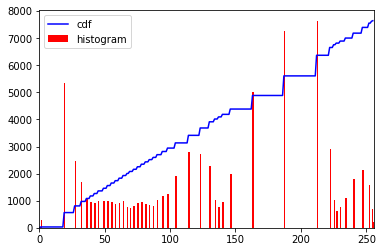

O histograma anteriormente fornecido não utiliza bem as faixas de cores disponíveis. Isso ocorre, pois apenas 50 dos 255 tons de cinza foram utilizados


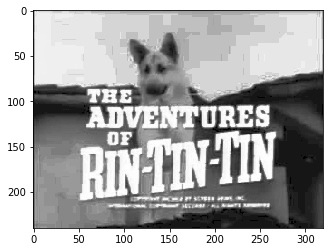

In [8]:

rintin_gray = cv2.equalizeHist(rintin_gray)

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

print("O histograma anteriormente fornecido não utiliza bem as faixas de cores disponíveis. Isso ocorre, pois apenas 50 dos 255 tons de cinza foram utilizados")

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


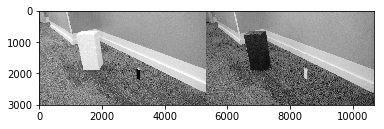

In [9]:
box_img = cv2.imread("hall_box_battery1.jpg")

box_img = cv2.cvtColor(box_img, cv2.COLOR_BGR2RGB)


box_img_r = box_img[:,:,0]
box_img_b = box_img[:,:,2]

res = np.hstack((box_img_r,box_img_b))

plt.imshow(res, cmap="Greys_r", vmin=0, vmax=255)






In [10]:
print("A partir das imagens acima, podemos observar a caixa e a bateria em branco o preto, se destacando do fundo")

A partir das imagens acima, podemos observar a caixa e a bateria em branco o preto, se destacando do fundo


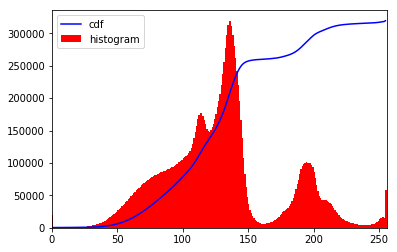

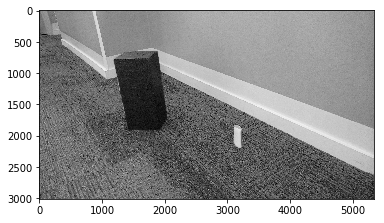

In [11]:
hist,bins = np.histogram(box_img_r.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(box_img_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.imshow(box_img_b, cmap="Greys_r", vmin=0, vmax=255)

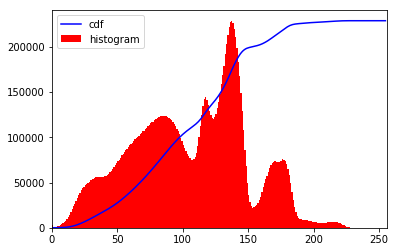

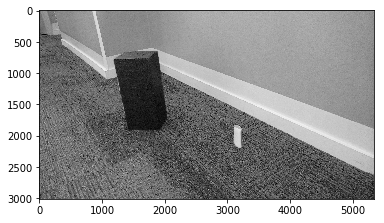

In [12]:
hist,bins = np.histogram(box_img_b.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(box_img_b.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

plt.imshow(box_img_b, cmap="Greys_r", vmin=0, vmax=255)

In [13]:
print("Já pelos histogramas, não é possivel identificar as caixas e sua posição na imagem")

Já pelos histogramas, não é possivel identificar as caixas e sua posição na imagem


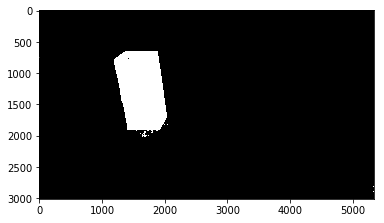

In [24]:
hsv = cv2.cvtColor(box_img, cv2.COLOR_BGR2HSV)

lower = np.array([112,50,50], dtype = "uint8")
upper = np.array([130,255,255], dtype = "uint8")


mask = cv2.inRange(hsv, lower, upper)

output = cv2.bitwise_and(hsv, hsv, mask = mask)

plt.imshow(mask, cmap="Greys_r", vmin=0, vmax=255)